# Jeff Jojer Jones E. Catulay
BSCS 3B

<h3> Data set Information </h3>

1.	1k_data_emoji_tweets_senti_posneg.xlsx –  Data set for Question-A
2.	15_emoticon_data.xlsx – This data set is just for your reference only

<h3> Question & Other Relevant Information </h3>

A.	Use 1k_data_emoji_tweets_senti_posneg.xlsx file to find sentiment Analysis using any Machine Learning Algorithm of your choice. This file contains sentiment text as well as UTF-8 code for emojis. Refer the following site to have more ideas about UTF-8. (50 marks)

https://www.utf8-chartable.de/unicode-utf8-table.pl?start=127808&utf8=char

B.	Further, you can build a real-time tweet sentiment Analyzer. (50 Marks)

Some ideas for this part: First make a definition with a simple sentence as a parameter: '😍 I love sentiment analysis 😊'. Now this sentence will use the classifier you have developed in Question-A, to identify the polarity.

Further, develop a text box to take real time tweets, I,e sentences with emojis provided by user using key board to analyze the sentiments of the given sentences.


<h2>Import Libraries</h2>

In [1]:
# import libraries
# for dataset
# pip install pandas
import pandas as pd, numpy as np

import matplotlib.pyplot as plt

# for vectorizing, creating model, splitting dataset, measuring accuracy
# pip install -U scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# for setting up parameters
# pip install pycaret
from pycaret.regression import *

# for user interface
# pip install ipywidgets
# pip install tk
import ipywidgets as widgets
import tkinter as tk

<h2>Load Dataset</h2>

In [2]:
# load the dataset
df = pd.read_csv("1k_data_emoji_tweets_senti_posneg.csv")
df = df.drop(df.columns[0], axis=1)
df.head()

,sentiment,post
0,1,Good morning every one
1,0,TW: S AssaultActually horrified how many frien...
2,1,Thanks by has notice of me Greetings : Jossett...
3,0,its ending soon aah unhappy 😧
4,1,My real time happy 😊


<h2>Dataset Cleaning, Checking and Analyzing</h2>

In [3]:
# checking dataset parameters
parameters = setup(data = df, target = 'sentiment')

,Description,Value
0,session_id,260
1,Target,sentiment
2,Original Data,"(1000, 2)"
3,Missing Values,False
4,Numeric Features,0
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(699, 699)"


Text(0.5, 1.0, 'Target Variable')

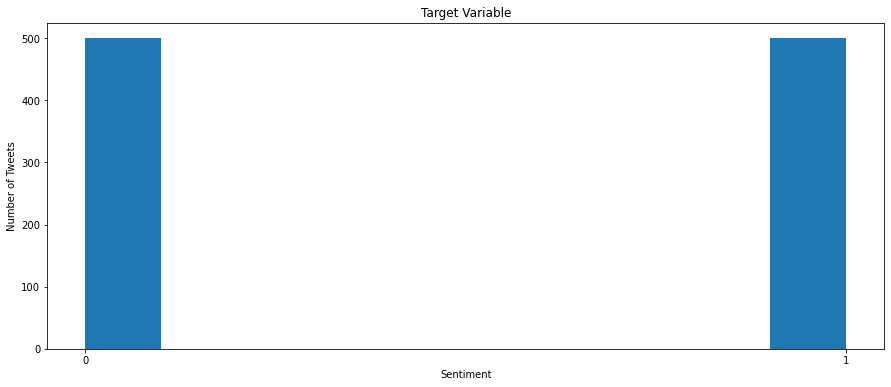

In [4]:
# graph the target variable
plt.figure(figsize=(15,6))
plt.hist(df['sentiment'])
plt.xlabel("Sentiment")
plt.xticks(range(0,2,1))
plt.ylabel("Number of Tweets")
plt.title("Target Variable")

<h2>Model Creation</h2>

In [5]:
# define the input and output variable
X = df['post']
tfidf = TfidfVectorizer(max_features = 10000, ngram_range = (1,2))
X = tfidf.fit_transform(X)
y = df['sentiment']

In [6]:
# define the training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [7]:
# create the model and fit data
model = LinearSVC()
model.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [8]:
prediction_value = model.predict(X_test)
print(classification_report(y_test, prediction_value))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       152
           1       0.77      0.84      0.80       148

    accuracy                           0.79       300
   macro avg       0.80      0.79      0.79       300
weighted avg       0.80      0.79      0.79       300



<h2>User Interface</h2>

In [9]:
# user interface using pywidgets
# define text input widget
input_text = widgets.Textarea(
    value = '',
    placeholder='Type something',
    disabled=False
)

# display widget
display(input_text)

# define button and output widget
say_sentiment_button = widgets.Button(description="Say Sentiment")
output = widgets.Output()
display(say_sentiment_button, output)

# on click function
def on_button_clicked(b):
    with output:
        input_sentiment = tfidf.transform([input_text.value])
        result = model.predict(input_sentiment)
        if(result == 0):
            print("\n\nYour input is '{0}'\n\nYOUR INPUT IS NEGATIVE SENTIMENT".format(input_text.value))
        else:
            print("\n\nYour input is '{0}'\n\nYOUR INPUT IS POSITIVE SENTIMENT".format(input_text.value))
        
say_sentiment_button.on_click(on_button_clicked)

# sample inputs
# I love sentiment analysis but it's too hard to study 😧
# My real time happy 😊

Textarea(value='', placeholder='Type something')

Button(description='Say Sentiment', style=ButtonStyle())

Output()

In [12]:
# user interface using tkinter
root= tk.Tk()
root.title("Laboratory No. 6")
root.resizable(False, False)
root.geometry('400x200')

# define frame
frame = tk.Frame(root, bg='black')
frame.pack(fill='both', expand='yes')

# define the input text
input_sentiment = tk.Entry (root) 
input_sentiment.pack()
input_sentiment.place(x = 10,
        y = 10,
        width=380,
        height=25)
input_sentiment.insert(0, "Enter Text Here")
input_sentiment.configure(font=("Courier", 10))

# define the output text
output_sentiment = tk.Text(root, height = 5, width = 380, bg='black', foreground="white") 
output_sentiment.bind("<Key>", lambda e: "break")
output_sentiment.configure(font=("Courier", 13))
output_sentiment.pack() 

# find sentiment based on the model
def findSentiment():
    user_input = input_sentiment.get()
    vec = tfidf.transform([user_input])
    result = model.predict(vec)
    separator = '---------------------------------------'
    if(result == 0):
        output_sentiment.insert(tk.END, "\nYour input is '{0}'\n\nYOUR INPUT IS NEGATIVE SENTIMENT\n{1}\n"
                                .format(user_input, separator)) 
    else:
        output_sentiment.insert(tk.END, "\nYour input is '{0}'\n\nYOUR INPUT IS POSITIVE SENTIMENT\n{1}\n"
                                .format(user_input, separator)) 
        
# clear text
def clearText():
    output_sentiment.delete('1.0', tk.END)
    input_sentiment.delete(0, tk.END)

# exit
def exit():
    root.destroy()


# define all the buttons
find_sentiment_btn = tk.Button(text='Say Sentiment', command = findSentiment,activeforeground = "red"
                               ,activebackground = "pink")
clear_btn = tk.Button(text='Clear', command = clearText,activeforeground = "red",activebackground = "pink")
exit_btn = tk.Button(text='Exit', command = exit,activeforeground = "red",activebackground = "pink")

find_sentiment_btn.pack(side='left', padx=10)
clear_btn.pack(side='left', padx=3)
exit_btn.pack(side='left', padx=3)

find_sentiment_btn.configure(font=("Courier", 10))
clear_btn.configure(font=("Courier", 10))
exit_btn.configure(font=("Courier", 10))

root.mainloop()